In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Reading the data from the .csv file

In [69]:
data = pd.read_csv(r"C:\Users\stnar\Desktop\PGP - AIML\W7 - Applied Statistics Project\Dataset_CSV; abtest.csv", header =0)

### Displaying first 5 rows of the dataset

In [3]:
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


### Checking the shape of the dataset along with its numerical column summaries

In [4]:
data.shape

(100, 6)

In [5]:
data.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


It is observed that there are 4 string type columns and only 2 numerical columns in the provided dataset.
The column "USER_ID" is numerical but cannot be considered for the EDA since it is a unique identifier of the user.

#### Exploring the unique values in the dataset

In [7]:
col = data.columns
cols = list(col)

#Variable "user_id" is a unique identifier and "time_spent_on_the_page" must be a continous variable. So, eliminating them from the list 

cols.remove("user_id")
cols.remove("time_spent_on_the_page")

for i in cols:
    print(data[i].unique())

['control' 'treatment']
['old' 'new']
['no' 'yes']
['Spanish' 'English' 'French']


Now we observe the following;
1. Variables "group", "landing_page", and "converted" are binary variables
2. There are only 3 preferred values for the "languages" variable

## EDA

### Univariate and Bivariate Analysis

In [8]:
# Determining Null Values in the columns

data.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

The dataset has no null values

#### Histogram of "time_spent_on_the_page" variable

C:\Users\stnar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\stnar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


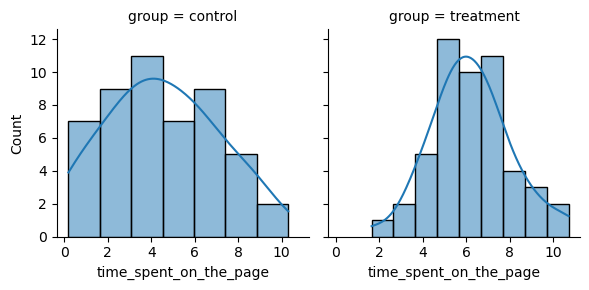

In [46]:
# plt.figsize=(3,3)
grid = sns.FacetGrid(data, col="group")
grid.map(sns.histplot, "time_spent_on_the_page",kde=True)
plt.show();

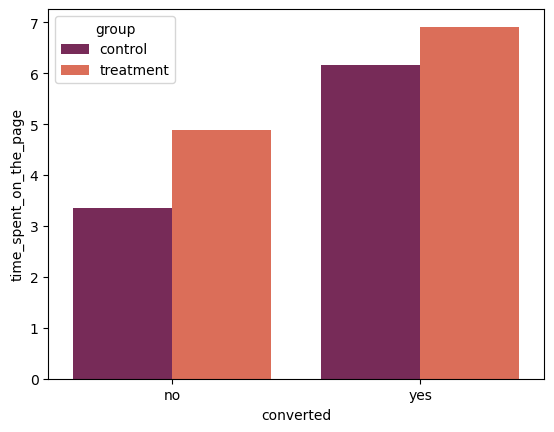

In [44]:
plt.figsize = (4,4)
sns.barplot(data, x= "converted", y = "time_spent_on_the_page", hue = 'group', palette = "rocket", errorbar = None)
plt.show()

## Understanding relationships between categorical variables

In [31]:
# Analyzing conversion rates between "group" and "converted" using "crosstab()" since both these variables are categorical

conversion_by_group = pd.crosstab(data['group'], data['converted'])
print(conversion_by_group)

converted  no  yes
group             
control    29   21
treatment  17   33


In [32]:
# Similarly, analyzing how "landing_page" and "converted" are related

conversion_by_landing_page = pd.crosstab(data['landing_page'], data['converted'])
print(conversion_by_landing_page)

converted     no  yes
landing_page         
new           17   33
old           29   21


## Insights basis EDA:

1. There are no NULL values in the dataset
2. There are 4 string type columns and only 2 numerical columns in the provided dataset. The column "USER_ID" is numerical but cannot be considered for the EDA since it is a unique identifier of the user.
3. Variables "group", "landing_page", and "converted" are binary variables and there are only 3 preferred values for the "languages" variable
4. The "timespent on average" histogram seems to be normally distributed for "Treatment" group while "Control" group's histogram seems right skewede

# Task-1

## Do the users spend more time on the new landing page than the old landing page

To find out if users spend more time on new landing page than the previous one, we can use the means of both the samples.

Let _m1_ be the mean time spent on new landing page

And let _m2_ be the mean time spent on old landing page  

In [57]:
m1=data[data["landing_page"] == "new"]["time_spent_on_the_page"].mean()
m2=data[data["landing_page"] == "old"]["time_spent_on_the_page"].mean()
print("Mean time spent on new landing page: ", round(m1,2), "mins")
print("Mean time spent on old landing page: ", round(m2,2), "mins")

Mean time spent on new landing page:  6.22 mins
Mean time spent on old landing page:  4.53 mins


Basis the problem statment, we formulate our NULL Hypothese (H0) and Alternative Hypothesis (Ha) as;

H0: m1 <= m2  
Ha: m1 > m2

Here we make the following assumptions:
1. Our sample size in each of classes greater than 30 (we have 50)
2. And the samples provided are randomly chosen
3. Standard Deviation is unknown

Since, Standard Deviation is unknown, we will be using the **_2 Sample Independent T-Test_** to get to the solution

In [59]:
sample1 = data[data["landing_page"] == "new"]["time_spent_on_the_page"]
sample2 = data[data["landing_page"] == "old"]["time_spent_on_the_page"]

In [63]:
from scipy.stats import ttest_ind

t_statistic, p_value = stats.ttest_ind(sample1, sample2, equal_var=True, alternative='greater')

print("p-value is: ", p_value)

p-value is:  0.0001316123528095005


#####  

##### Provided the significance level of 0.05 and we received a _p-value_ (0.00013) << 0.05. 
#### We conclude Null Hypothesis can be REJECTED and the users spend more time on the new landing page than the old landing page 

# Task - 2 

## Is the conversion rate for the new page greater than that of old page?

In [70]:
# Adding a new column called 'Convert_Num' which is numeric in nature (0- No, 1-Yes)

data['convert_num'] = data['converted'].map({"no":0, "yes":1})
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred,convert_num
0,546592,control,old,3.48,no,Spanish,0
1,546468,treatment,new,7.13,yes,English,1
2,546462,treatment,new,4.40,no,Spanish,0
3,546567,control,old,3.02,no,French,0
4,546459,treatment,new,4.75,yes,Spanish,1


#### Here, we note that the coverted status is a binary variable. And the disturbution seems to _Binomial_ in nature.

#### Also, considering there are two populations, old and new (basis "groups" variable), we will be using a one-tailed test, concerning two populations. So, we will use **Two proportions Z-Test** for this problemt

Below are the following assumptions we make;

1. Binomially distributed populations
2. Independent populations
3. Random sampling from the populations
4. When both mean (np) and n(1-p) are greater than or equal to 10, the binomial distribution can be approximated by a normal distribution

In [81]:
# Calculating np and n(1-p) values;

new_converse_count = data[data["landing_page"] == "new"]["convert_num"].sum()
old_converse_count = data[data["landing_page"] == "old"]["convert_num"].sum()

r_new = new_converse_count/50
r_old = old_converse_count/50

print(" New conversion rate is :",r_new, "\n", "Old conversion rate is :",r_old)

 New conversion rate is : 0.66 
 Old conversion rate is : 0.42


Clearly, new_converse_count, old_converse_count are **> 10**.

So, we can apply _Two proportions Z-Test_

##### Here, our H0, Ha will be the following;

**H0: r_new <= r_old**

**Ha: r_new > r_old**

In [92]:
val = r_new - r_old

from statsmodels.stats.proportion import proportions_ztest

tstat, pval = proportions_ztest(count = new_converse_count, nobs = 50, value= val, alternative='larger')

print("p-value is: ", pval)

p-value is:  1.8127329420025457e-10


#### Since the p-value (1.81e-10) << Significance Level (0.05), we can REJECT the NULL Hypothesis

### Hence, we conclude conversion rate for the new page greater than that of old page

# Task - 3

## Does the converted status depend on the preferred language?

Here, we are dealing with two discrete variables; _converted_status_ and _language_.

So, we'll be applying a Chi-Square test to determine if conversion of a user depends on their language or not.

Hence, below will be our H0 and Ha;

**H0: _converted_status_ is independent of _language_**

**Ha: _converted_status_ is _dependent_ of _language_**

In [95]:
# Since both are categorical variables, we'll be creating a contingencey matrix;

from sklearn.metrics.cluster import contingency_matrix

cm = contingency_matrix(data['converted'], data['language_preferred'])

print("The contingency matrix is:", "\n", cm)

The contingency matrix is: 
 [[11 19 16]
 [21 15 18]]


From the above, we observe the following:

1. Both are categorical variables
2. Expected value of the number of sample observations in each level of the variable is at least 5
3. Random sample from the population is considered

So, we can proceed with Chi-Square test

In [103]:
from scipy.stats import chi2_contingency

stat, pval, *_ = chi2_contingency(cm)

print("P-value is: ", pval)

P-value is:  0.21298887487543447


#### Since the p-value (0.213) > Significance Level (0.05), we can FAIL TO REJECT the NULL Hypothesis

### Hence, we conclude that _converted_status_ is independent of _language_preferred_

# Task - 4

## Is the mean time spent on the new page same for the different language users?

Here, we require to analyse the mean time spent by users of different languages on the new page and confirm whether they're the same.

We can clearly use **ANOVA** Test since we are comparing means of different population at once.

So, let _m1, m2, m3_ be mean time for users basis the languages on the new page respectively. (Since we have only 3 languages)  

In [122]:
#Calculating mean time spent by users of different languages on the new page;

m1 = data.query("language_preferred == 'Spanish' & landing_page == 'new'")["time_spent_on_the_page"].mean()
m2 = data.query("language_preferred == 'English' & landing_page == 'new'")["time_spent_on_the_page"].mean()
m3 = data.query("language_preferred == 'French' & landing_page == 'new'")["time_spent_on_the_page"].mean()

print("The mean time spent on new landing page by users with preferred language 'Spanish' is:", round(m1,2))
print("The mean time spent on new landing page by users with preferred language 'English' is:", round(m2,2))
print("The mean time spent on new landing page by users with preferred language 'French' is:", round(m3,2))

The mean time spent on new landing page by users with preferred language 'Spanish' is: 5.84
The mean time spent on new landing page by users with preferred language 'English' is: 6.66
The mean time spent on new landing page by users with preferred language 'French' is: 6.2


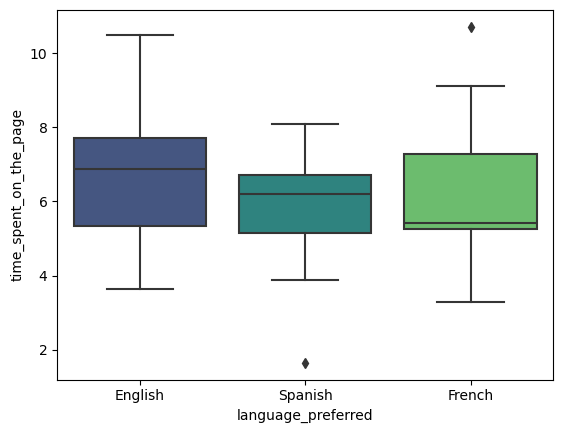

In [128]:
#Understanding the between group and with-in group variations using Box Plot

plt.figsize = (10,15)
sns.boxplot(data[data["landing_page"] == 'new'], x="language_preferred", y = "time_spent_on_the_page", palette='viridis')
plt.show()

#### ANOVA test

Now, we define our H0 and Ha as:

**H0: m1 = m2 = m3**

**Ha: atleast one of the means is not equal to others**

In [129]:
d1 = data.query("language_preferred == 'Spanish' & landing_page == 'new'")["time_spent_on_the_page"]
d2 = data.query("language_preferred == 'English' & landing_page == 'new'")["time_spent_on_the_page"]
d3 = data.query("language_preferred == 'French' & landing_page == 'new'")["time_spent_on_the_page"]

In [131]:
from scipy.stats import f_oneway

stat, pval = f_oneway(d1, d2, d3)

print("P-value is: ", pval)

P-value is:  0.43204138694325955


#### Since the p-value (0.432) > Significance Level (0.05), we can FAIL TO REJECT the NULL Hypothesis

### Hence, we conclude that _atleast one_ of the means is not equal to others

## _------------------------- End -------------------------_